In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tempfile
import pytz
from datetime import datetime
import pyart

templocation = tempfile.mkdtemp()


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/vijay/.pyenv/versions/3.6.0/envs/soil/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/Users/vijay/.pyenv/versions/3.6.0/envs/soil/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


In [2]:
import nexradaws
conn = nexradaws.NexradAwsInterface()

In [3]:
central_timezone = pytz.timezone('US/Central')
radar_id = 'KTLX'
start = central_timezone.localize(datetime(2013,5,31,17,0))
end = central_timezone.localize (datetime(2013,5,31,19,0))
scans = conn.get_avail_scans_in_range(start, end, radar_id)
print("There are {} scans available between {} and {}\n".format(len(scans), start, end))
print(scans[0:4])

There are 26 scans available between 2013-05-31 17:00:00-05:00 and 2013-05-31 19:00:00-05:00

[<AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_220114_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_220537_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_221011_V06.gz>, <AwsNexradFile object - 2013/05/31/KTLX/KTLX20130531_221445_V06.gz>]


In [4]:
results = conn.download(scans[0:4], templocation)


Downloaded KTLX20130531_221011_V06.gz
Downloaded KTLX20130531_220537_V06.gz
Downloaded KTLX20130531_220114_V06.gz
Downloaded KTLX20130531_221445_V06.gz
4 out of 4 files downloaded...0 errors


> <ipython-input-12-5a711b67591f>(2)<module>()
-> for i,scan in enumerate(results.iter_success(),start=1):
(Pdb) scan
<LocalNexradFile object - /var/folders/gs/sf3x90q945dgry9930js32gc0000gn/T/tmpcyk4mqv1/KTLX20130531_220114_V06.gz>
(Pdb) scan.__dict__
{'key': '2013/05/31/KTLX/KTLX20130531_220114_V06.gz', 'last_modified': datetime.datetime(2015, 10, 26, 9, 28, 42, tzinfo=tzutc()), 'filename': 'KTLX20130531_220114_V06.gz', 'scan_time': datetime.datetime(2013, 5, 31, 22, 1, 14, tzinfo=<UTC>), 'radar_id': 'KTLX', 'filepath': '/var/folders/gs/sf3x90q945dgry9930js32gc0000gn/T/tmpcyk4mqv1/KTLX20130531_220114_V06.gz'}
(Pdb) q


BdbQuit: 

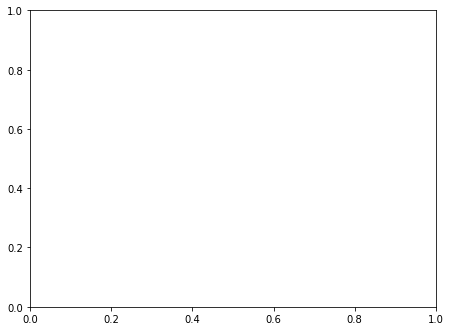

In [12]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    import pdb; pdb.set_trace()

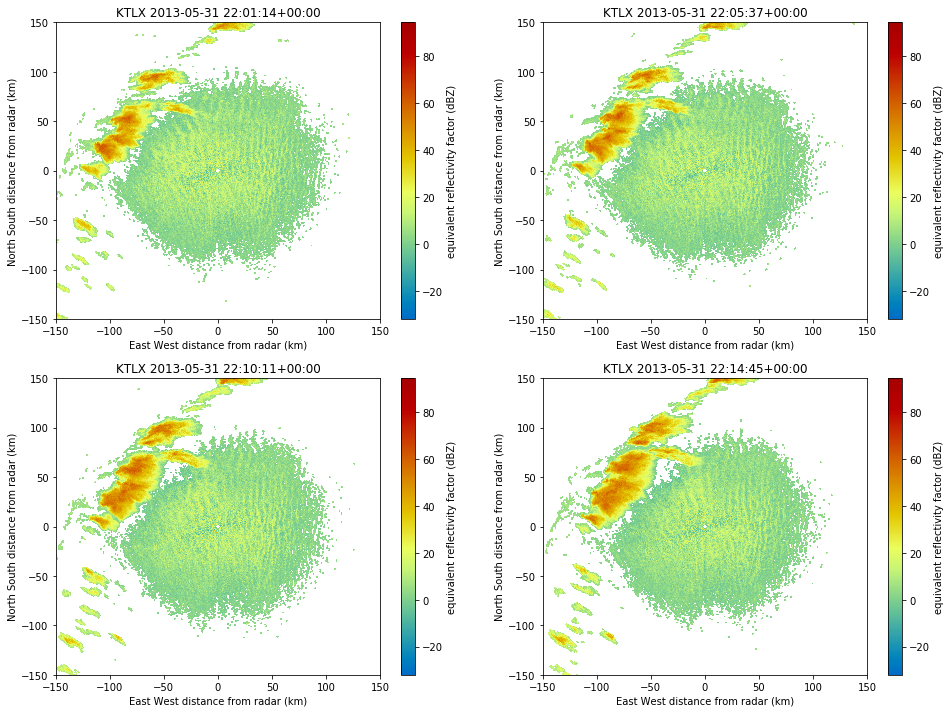

In [5]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    radar = scan.open_pyart()
    display = pyart.graph.RadarDisplay(radar)
    display.plot('reflectivity',0,ax=ax,title="{} {}".format(scan.radar_id,scan.scan_time))
    display.set_limits((-150, 150), (-150, 150), ax=ax)

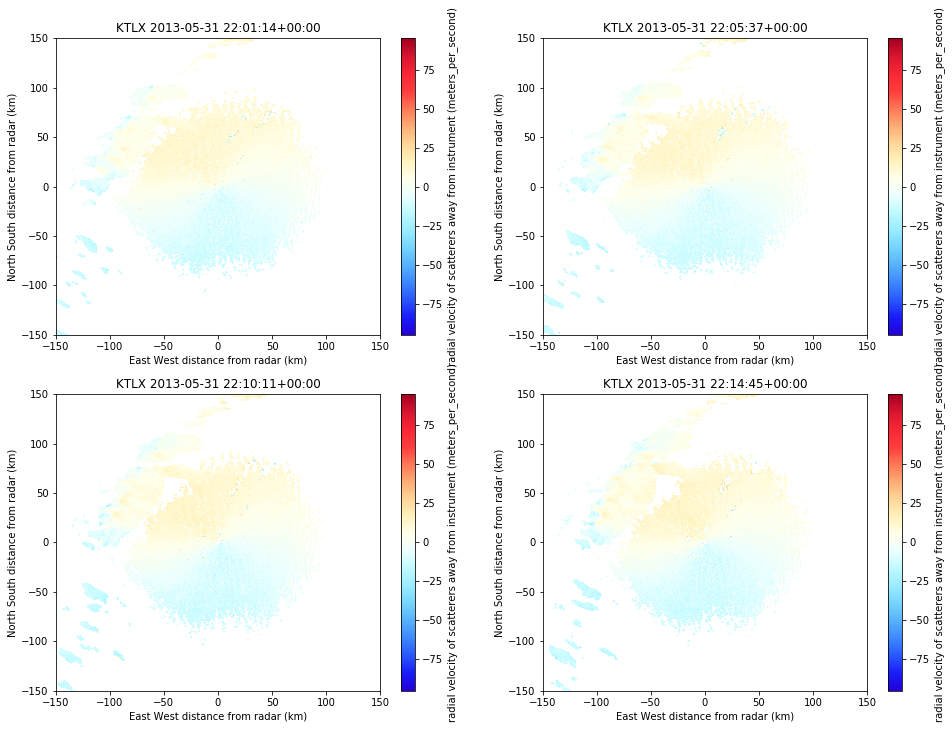

In [6]:
fig = plt.figure(figsize=(16,12))
for i,scan in enumerate(results.iter_success(),start=1):
    ax = fig.add_subplot(2,2,i)
    radar = scan.open_pyart()
    display = pyart.graph.RadarDisplay(radar)
    display.plot('velocity',1,ax=ax,title="{} {}".format(scan.radar_id,scan.scan_time))
    display.set_limits((-150, 150), (-150, 150), ax=ax)

In [1]:
import pytesmo.io.ismn.interface as ismn
import os
import matplotlib.pyplot as plt
import random

In [8]:
score = 0.718122

In [2]:
import os 
station_ids = ["2214","2215","2189","2190","2187","2183","2191","2192","2185","2184","2218","2149","2217","2186","2219"]
station_ids = ["2214"]
website_template = "https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customSingleStationReport/daily/start_of_period/{}:CA:SCAN%7Cid=%22%22%7Cname/-2525,0/stationId,TMAX::value,TMIN::value,PRCP::value,RHUM::value:hourly%20MEAN,WSPDX::value:hourly%20MAX,WSPDV::value:hourly%20MEAN,SRADV::value:hourly%20MEAN,LRADT::value,PVPV::value:hourly%20MEAN,SVPV::value:hourly%20MEAN,SMS:-2:value:hourly%20MEAN,SMS:-4:value:hourly%20MEAN,SMS:-8:value:hourly%20MEAN,SMS:-20:value:hourly%20MEAN,SMS:-40:value:hourly%20MEAN,STO:-2:value:hourly%20MEAN,STO:-4:value:hourly%20MEAN,STO:-8:value:hourly%20MEAN,STO:-20:value:hourly%20MEAN,STO:-40:value:hourly%20MEAN"
system_call = "curl {} -o {}"

for id in station_ids:
    site = website_template.format(id)
    file_name = id + '.csv'
    os.system(system_call.format(site, file_name))

In [11]:
import pandas
df = pandas.read_csv('/Users/vijay/soil/train.csv')
df = df.dropna()
print(df)

          Date  Station Id  Air Temperature Maximum (degF)  \
70     10/2/13      2198.0                            54.0   
71     10/3/13      2198.0                            55.0   
72     10/4/13      2198.0                            58.0   
73     10/5/13      2198.0                            64.0   
74     10/6/13      2198.0                            72.0   
75     10/7/13      2198.0                            62.0   
76     10/8/13      2198.0                            47.0   
77     10/9/13      2198.0                            51.0   
78    10/10/13      2198.0                            53.0   
79    10/11/13      2198.0                            53.0   
80    10/12/13      2198.0                            52.0   
82    10/14/13      2198.0                            57.0   
83    10/15/13      2198.0                            58.0   
84    10/16/13      2198.0                            58.0   
85    10/17/13      2198.0                            56.0   
86    10

In [9]:
from sklearn.linear_model import LogiticRegression
log_reg = LogiticRegression()

X_train = df[['Precipitation Increment (in)', 
            'Relative Humidity (pct) Mean of Hourly Values',
            'Wind Speed Maximum (mph) Max of Hourly Values']]
y_train = df['Soil Moisture Percent -2in (pct) Mean of Hourly Values']

log_reg.fit(X_train, y_train)
print(log_reg.predict(X[:2, :]))

0.718122
